In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import glob

from pylab import cm
from matplotlib.colors import LogNorm

In [3]:
dump_files = 'analysis/2020-06-06-h10m44/*.npy'
spectrum_file = '../../MTF_CWO/Al_spectrum.txt'
# spectrum_file = '/home/xcite/EGSnrc/egs_home/BEAM_EX16MVp/W_FF_spectrum'
deposition_efficiency_file = 'analysis/2020-06-04-h08m58/EnergyDeposition.npy'

In [4]:
files = sorted(glob.glob(dump_files))

for ii, file in enumerate(files):
    
    if ii == 0:
        
        # Make the first entry zeros
        first_kernel = np.load(file)
        kernels = np.zeros([len(files)+1,first_kernel.shape[0],first_kernel.shape[1]]) 
        
    kernels[ii+1] = np.load(file)

In [5]:
energies = []
fluence = []
with open(spectrum_file) as f:
    for line in f:
        energies.append(float(line.split()[0]))
        fluence.append(float(line.split()[1]))
        
fluence = fluence/sum(fluence)

plt.figure(44)
plt.plot(energies,fluence)

<IPython.core.display.Javascript object>

In [6]:
energies = []
fluence = []
with open(spectrum_file) as f:
    for line in f:
        energies.append(float(line.split()[0]))
        fluence.append(float(line.split()[1]))
        
fluence = fluence/sum(fluence)

plt.figure(44)
plt.plot(energies,fluence)

In [7]:
deposition_summed = np.load(deposition_efficiency_file,allow_pickle=True)
deposition_summed = np.append(deposition_summed[0],50000.5)
deposition_summed = np.insert(deposition_summed,0,0)

In [8]:
original_energies_keV = np.array([0, 30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

deposition_interpolated = np.interp(np.array(energies)*1000, original_energies_keV, deposition_summed)

In [9]:
super_kernel = np.zeros([len(fluence),kernels.shape[1],kernels.shape[2]])

for ii in range(kernels.shape[1]):
    for jj in range(kernels.shape[2]):
        
        super_kernel[:,ii,jj] = np.interp(np.array(energies)*1000, original_energies_keV, kernels[:,ii,jj])
        
plt.figure()
plt.imshow(super_kernel[:,25,:])

plt.figure()
plt.imshow(kernels[:,25,:])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
weights = fluence*deposition_interpolated
weights = weights/sum(weights)

In [11]:
plt.figure()
plt.plot(weights)

<IPython.core.display.Javascript object>

In [12]:
normalized_kernel = super_kernel.copy()

for ii in range(0,normalized_kernel.shape[0]):
    
    normalized_kernel[ii,:,:] = super_kernel[ii,:,:]/sum(super_kernel[ii,:,:])
    
plt.figure()
plt.imshow(normalized_kernel[:,25,:], cmap=cm.jet, norm=LogNorm())

<IPython.core.display.Javascript object>

In [13]:
actual_kernel_all = normalized_kernel.T@weights

# plt.figure()
# plt.imshow(actual_kernel_all[:,25,:], cmap=cm.jet, norm=LogNorm())

# actual_kernel = sum(actual_kernel_all,2)

In [14]:
plt.figure()
plt.imshow(actual_kernel_all)#, cmap=cm.jet, norm=LogNorm())
axis('image')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
cbar = plt.colorbar()
cbar.set_label('Counts')

<IPython.core.display.Javascript object>

In [15]:
lsf = actual_kernel_all[25,:]

# lsf = actual_kernel_all[:,25,170]

# evens = lsf[::2]
# odds = lsf[1::2]

# lsf_binned = (evens +odds)/2

# lsf = lsf_binned

In [16]:
# mtf = np.absolute(np.fft.fft(lsf, 128))
# mtf_final = np.fft.fftshift(mtf)


plt.figure(1)
# plt.plot(mtf_final[64:]/mtf_final[64])

T = 0.784
N = 50

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

mtf = np.absolute(np.fft.fft(lsf))
mtf_final = np.fft.fftshift(mtf)
# x_mtf_final = np.arange(0,1,1./127)
# mtf_final = mtf_final[1024:1151]/np.amax(mtf_final[1024:1151])

# plt.subplot(2, 2, 4)
# x_mtf_final = np.arange(0,1,1./127*2)
# mtf_final = mtf_final[1024:1345]/np.amax(mtf_final[1024:1151])
# # mtf_final_smooth = mtf_final_smooth[1024:1151]/np.amax(mtf_final_smooth[1024:1151])
plt.plot(xf[:24],mtf_final[25:49]/mtf_final[25])
plt.ylim(0,1.1)
# plt.xlim(0,0.784)
plt.grid(which='both')
# plt.xlabel("cycles/pixel")
# plt.ylabel("Modulation Factor")
# plt.title("MTF Curve")
# yellow_patch = mpatches.Patch(color='yellow', label='Raw MTF')
# blue_patch = mpatches.Patch(color='blue', label='Smooth MTF')
# plt.legend(handles=[yellow_patch, blue_patch])
# plt.show()
# return mtf

<IPython.core.display.Javascript object>

In [17]:
# mtf = np.absolute(np.fft.fft(lsf, 128))
# mtf_final = np.fft.fftshift(mtf)


plt.figure(1)
# plt.plot(mtf_final[64:]/mtf_final[64])

T = 0.784
N = 50

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

mtf = np.absolute(np.fft.fft(lsf))
mtf_final = np.fft.fftshift(mtf)
# x_mtf_final = np.arange(0,1,1./127)
# mtf_final = mtf_final[1024:1151]/np.amax(mtf_final[1024:1151])

# plt.subplot(2, 2, 4)
# x_mtf_final = np.arange(0,1,1./127*2)
# mtf_final = mtf_final[1024:1345]/np.amax(mtf_final[1024:1151])
# # mtf_final_smooth = mtf_final_smooth[1024:1151]/np.amax(mtf_final_smooth[1024:1151])
plt.plot(xf[:24],mtf_final[25:49]/mtf_final[25])
plt.ylim(0,1.1)
# plt.xlim(0,0.784)
plt.grid(which='both')
# plt.xlabel("cycles/pixel")
# plt.ylabel("Modulation Factor")
# plt.title("MTF Curve")
# yellow_patch = mpatches.Patch(color='yellow', label='Raw MTF')
# blue_patch = mpatches.Patch(color='blue', label='Smooth MTF')
# plt.legend(handles=[yellow_patch, blue_patch])
# plt.show()
# return mtf

In [18]:
import xpecgen.xpecgen as xg
import tigre
import copy
import tigre.algorithms as algs
import numpy as np
import tigre.algorithms as algs
import time
import sys

phantom_mapping = ['air','water','bone','brain','bone']
phantom = np.load('segemented_head_phantom.npy')

# Don't want to look for zeros
useful_phantom = phantom != 0

masks = np.zeros([len(phantom_mapping)-1,useful_phantom.shape[0],useful_phantom.shape[1],useful_phantom.shape[2]])
mapping_functions = []

# Get the mapping functions for the different tissues
for ii in range(1,len(phantom_mapping)):
    
    mapping_functions.append(xg.get_mu(phantom_mapping[ii]))
    masks[ii-1] = phantom == ii

In [32]:
print(original_energies_keV)

[  30   40   50   60   70   80   90  100  300  500  700  900 1000 2000
 4000 6000]


In [19]:
geo = tigre.geometry_default(high_quality=False)

angles = np.linspace(0, 0, 1, dtype=np.float32)

energy = 100

phantom2 = phantom.copy().astype(np.float32)

proj = []

for energy in original_energies_keV[1:]:
    for ii in range(0,len(phantom_mapping)-1):

        phantom2[masks[ii].astype(bool)] = mapping_functions[ii](energy)

    proj.append(np.squeeze(tigre.Ax(phantom2,geo,angles)))

<IPython.core.display.Javascript object>


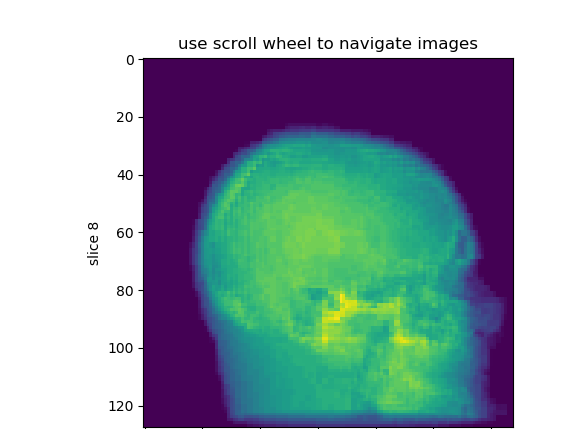

In [20]:
proj = np.array(proj)

class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

# def scroll_plot(X):

fig, ax = plt.subplots(1, 1)
tracker = IndexTracker(ax, np.rot90(proj.T,3))
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()
    
# return fig, tracker, ax

# scroll_plot(proj.T)

In [21]:
from scipy.ndimage import filters
from scipy.signal import fftconvolve

In [22]:
proj_filt = proj.copy()

for ii in range(len(original_energies_keV)-1):

    proj_filt[ii] = fftconvolve(proj[ii],kernels[ii+1], mode = 'same')

<IPython.core.display.Javascript object>


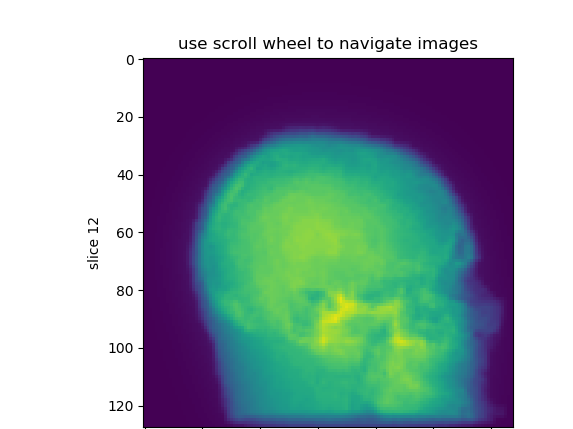

In [23]:
fig, ax = plt.subplots(1, 1)
tracker = IndexTracker(ax, np.rot90(proj_filt.T,3))
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [33]:
original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

fluence_small = np.interp(original_energies_keV,np.array(energies)*1000, fluence)

In [41]:
weights_small.shape

(16,)

In [35]:
weights_small = fluence_small*deposition_summed[1:]

In [39]:
weights_small = weights_small/sum(weights_small)

In [37]:
final_proj = proj_filt.T@weights_small

<IPython.core.display.Javascript object>


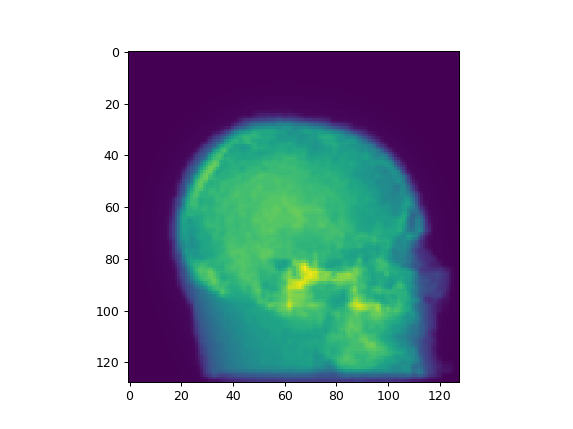

In [38]:
plt.figure()
plt.imshow(np.rot90(final_proj,3))

<IPython.core.display.Javascript object>


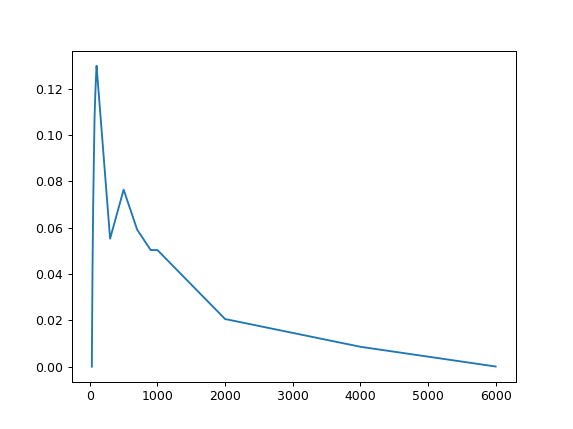

In [30]:
plt.figure()
plt.plot(original_energies_keV,weights_small)

In [31]:
def polyquant_grad(specData,A,At,I0,rho,y,ind,scatFun,subSet,w):
% This function calculates the gradient, objective function unless using
% OS, and the scatter if calculated on the fly.
projSet = cell(length(specData.hinge)-1,2);
mask = cell(length(specData.hinge)-1,1);
projSet{1,2} = 0;
for k = 1:length(specData.hinge)-1
    mask{k} = double(rho > specData.hinge(k) & rho < specData.hinge(k+1));
    projSet{k,1} = A(mask{k}.*rho,ind);
    if k>1
        projSet{k,2} = A(mask{k},ind);
    end
end
specProb = specData.spectrum./sum(specData.spectrum(:));
    
mainFac = zeros(size(y));
hingeFac = cell(length(specData.hinge)-1);
for k = 1:length(specData.hinge)-1
    hingeFac{k} = zeros(size(y));
end

if length(specData.hinge)>2  % to bodge error for one linear fit
    s = scatFun(I0,projSet{1,1},projSet{2,1},projSet{2,2},rho,subSet,specData.knee);
else
    s = scatFun(I0,projSet{1,1},projSet{1,1},projSet{1,2},rho,subSet,specData.knee);
end
for k = 1:length(specData.spectrum)
    linSum = zeros(size(y));
    for l = 1:length(specData.hinge)-1
        linSum = linSum+specData.knee(1,l,k)*projSet{l,1}...
                       +specData.knee(2,l,k)*projSet{l,2};
    end
    tmp = specProb(k).*exp(-linSum);
    mainFac = mainFac+tmp;
    for l = 1:length(specData.hinge)-1
        hingeFac{l} = hingeFac{l}+tmp*specData.knee(1,l,k);
    end
end
mainFac = I0.*mainFac;

deriFac = w(y./(mainFac+s)-1);

out = zeros(size(rho));
for l = 1:length(specData.hinge)-1
    out = out+mask{l}.*At(I0.*hingeFac{l}.*deriFac,ind);
end

strOut.grad = out;
strOut.objFac = mainFac;
strOut.s = s;
end

IndentationError: expected an indented block (<ipython-input-31-d8094e45fa76>, line 2)

In [ ]:
def poly_sks(i0,projA,projB,projC,im,ang,specData,scatParam,nPad,cg,ig,gamma):
# %~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# % Estimates scatter given polyquant information during an iteration
# %~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# % Parameters
# % ----------
# % i0            -- the incident intensity (flat field).
# % projA         -- projection from first linear fit.
# % projB         -- projection from second linear fit.
# % projC         -- offset projection from second linear fit.
# % im            -- the current estimate.
# % ang           -- an array of projection angles.
# % specData      -- spectrum data array.
# % scatParam     -- scatter kernel parameters.
# % nPad          -- padding for FFT filtering.
# % cg            -- the system geometry (from Fessler's toolbox)
# % ig            -- the image geometery (from Fessler's toolbox).
# % gamma         -- edge compensation fudge factors:
# %      gamma(1) -> edge attenuation scaling factor.
# %      gamma(2) -> sets upper limit for attenuating effect.
# %      gamma==0 -> no edge compensation.
# %~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# % Created:      07/03/2018
# % Last edit:    26/04/2019
# % Jonathan Hugh Mason
# %
# %~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# % References: (please cite if making use of this code or its methods) 
# % Jonathan H Mason et al 2017 Phys. Med. Biol. 62 8739
# % Jonathan H Mason et al 2018 Phys. Med. Biol. 63 225001
# %~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
arr1 = (-(cg.ns-1)/2-nPad:(cg.ns-1)/2+nPad)*cg.ds; %
if size(i0,2) == size(i0,1)
    arr2 = arr1;
else
    arr2 = (-(cg.nt-1)/2-nPad:(cg.nt-1)/2+nPad)*cg.dt;
end
[us,vs] = ndgrid(arr1,arr2);
uu = ((-(cg.ns-1)/2:(cg.ns-1)/2)+cg.offset_s)*cg.ds;
eDen = projA+projB;

%% Calculate the magnification factor
projScat = zeros(size(i0));
centPo = round(size(im)/2);
RP = regionprops(double(im(:,:,centPo(3))>0.1),'Centroid','MajorAxisLength','MinorAxisLength','Orientation');

tranF = (RP.Centroid-centPo([2,1]))*ig.dx;
trans = [tranF,0];
magFactor = zeros(size(i0,3),1);
tmpFac = zeros(size(i0));
for k = 1:size(i0,3)
    rotAng = ang(k);
    out = ell_centroid(rotAng,RP.MinorAxisLength*ig.dx/2,RP.MajorAxisLength*ig.dx/2,...
                  tranF(1),tranF(2),uu,true,cg);
    tmpFac(:,:,k) = repmat((cg.dod-out')./cg.dod,1,size(i0,2));
    rotAng = ang(k);
    rotMat = [cosd(rotAng),-sind(rotAng),0;
             sind(rotAng),cosd(rotAng),0;
             0,0,1];
    rotTrans = rotMat*trans';
    
    magFactor(k) = (cg.dod-rotTrans(1))/cg.dod;
    tmpFac(:,:,k) = repmat(magFactor(k),size(i0,1),size(i0,2)).^2;
    
end

%% Calculate the convolutional scatters
scat1 = zeros(size(i0,1)+2*nPad,size(i0,2)+2*nPad,size(i0,3));
g = scat1;
broad = zeros(size(i0));
specProb = specData.spectrum(:).*specData.response(:)./sum(specData.spectrum(:).*specData.response(:));

for k = 1:length(specData.energy)
    % Estimate the attenuation from the polyquant projections
    atten = specData.knee(1,1,k)*projA+specData.knee(1,2,k)*projB+specData.knee(2,2,k)*projC;
    % Narrow scatter field calculation
    A = scatParam.fA1(k,1)*ones(size(i0));...
        C = scatParam.C1(k);
    for i = 1:size(i0,3)
        A(:,:,i) = A(:,:,i)./tmpFac(:,:,i);
        tmpC = magFactor(i)*C;
        g(:,:,i) = exp(-(us.^2+vs.^2)/(tmpC^2));
    end
    
    fg = fft2(g);
    
    projFor = specProb(k)*A.*i0.*exp(-atten).*(eDen);
    scat1 = scat1+fft2(padarray(projFor,[nPad,nPad,0])).*fg;

    % Broad scatter field calculation
    A = scatParam.fA2(k,1)*ones(size(i0)); x2 = scatParam.fA2(k,2); x3 = scatParam.fA2(k,3);
    for i = 1:size(i0,3)
        A(:,:,i) = A(:,:,i)./tmpFac(:,:,i);
    end
    broadTmp = specProb(k)*A.*i0.*exp(-atten*x2).*(eDen.^x3);

    broad = broad+broadTmp;
end

if (gamma)
    broad = edge_factor(scatParam.eFac.*gamma(1),eDen,broad,abs(gamma(2)),cg);
end

gBroad = zeros(size(scat1));
for i = 1:size(i0,3)
    tmpC = sqrt(magFactor(i))*scatParam.C2(1);
    gBroad(:,:,i) = exp(-(us.^2+vs.^2)/(tmpC^2));
end

fg = fft2(gBroad);
scat1 = scat1+fft2(padarray(broad,[nPad,nPad,0])).*fg;

for j = 1:size(projA,3)
        projScat(:,:,j) = real(unpad(ifftshift(ifft2(scat1(:,:,j))),nPad));
end

projScat(projScat<0) = 0;  % ensure the scatter is non-negative

out = projScat;
end

function out = unpad(in,nPad)
sz1 = size(in,1); sz2 = size(in,2);
out = in(1+nPad:sz1-nPad,1+nPad:sz2-nPad,:);
end

function out = edge_factor(factor,eDen,broadIn,sig,cg)
%% The edge compensation factor
eDen = imgaussfilt(eDen,10);
[gradX,gradY] = gradient_op3d(eDen);

shiftFacX = eDen.*gradX.*factor./cg.ds;
shiftFacY = eDen.*gradY.*factor./cg.dt;
shiftFacX(abs(shiftFacX)>sig) = sig;
shiftFacY(abs(shiftFacX)>sig) = sig;

out = broadIn.*exp(-(shiftFacX.^2)./(35.^2)-(shiftFacY.^2)./(35.^2));
end